In [128]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Q1

C:\Users\pksam\AppData\Local\Temp\ipykernel_17476\2877487422.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * t)


Lifetime: (473.56675752523284 ± 55.28239131380527) s
Fit acceptable at 5% level of significance: False


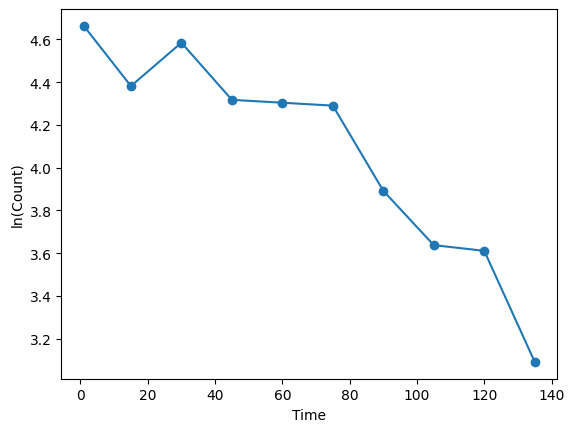

In [120]:
time=np.array([1, 15, 30, 45, 60, 75, 90, 105, 120, 135])
counts=np.array([106, 80, 98, 75, 74, 73, 49, 38, 37, 22])
uncertainity = np.array([10, 9, 10, 9, 8, 8, 7, 6, 6, 5])

def f(t, a, b):
	return a * np.exp(-b * t)

ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

s , v = curve_fit(f, time, ln_counts, sigma=sigma_ln_counts, absolute_sigma=True)
lifetime = 1 / s[1]
error_lifetime = np.sqrt(np.diag(v))[1] / s[1]**2

chi_square = np.sum(((ln_counts - f(time, *s)) / sigma_ln_counts) ** 2)
reduced_chi_square = chi_square / (len(time) - len(s))

chi_square_critical = 15.5 #calculated
fit_acceptable = chi_square <= chi_square_critical
print(f"Lifetime: ({lifetime} ± {error_lifetime}) s")
print(f"Fit acceptable at 5% level of significance: {fit_acceptable}")

s = np.array(s)
plt.plot(time, ln_counts, 'o-')
plt.xlabel('Time')
plt.ylabel('ln(Count)')
plt.show()

## Q2

In [132]:
def fixed_point(g, x0, t=1e-5, max_iteration=100):
    for iterations in range(1, max_iteration):
        x1 = g(x0)
        if abs(x1 - x0) < t:
            return x1, iterations
        x0 = x1
    raise RuntimeError("did not converge, try a different initial guess")
T = 300
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422
initial_guess = 1.0
eps=1e-5

def g1(V):
    return R*T/(p+(a/(V**2))) + b
root, Num_iter = fixed_point(g1, initial_guess, eps)

print(f"Using g1 Root: {root:.5f} iterations: {Num_iter}")

def g2(V):
    return math.sqrt(a/(R*T/(V-b) - p))
root, Num_iter = fixed_point(g2, initial_guess, eps)

print(f"Using g2 Root: {root:.5f} iterations: {Num_iter}")

Using g1 Root: 3.92995 iterations: 9
Using g2 Root: 0.18568 iterations: 28


In [130]:
def power_method(A, n: int):
	n = A.shape[0]
	v = np.random.rand(n)
	for _ in range(n):
		Av = np.dot(A, v)
		v = Av / np.linalg.norm(Av)
	eigenvalue = np.dot(v, np.dot(A, v)) / np.dot(v, v)
	eigenvector = v
	return eigenvalue, eigenvector

A = np.array([
    [2, -1, 0, 0, 0],
    [-1, 2, -1, 0, 0],
    [0, -1, 2, -1, 0],
    [0, 0, -1, 2, -1],
    [0, 0, 0, -1, 2]])

eigenvalues = []
eigenvectors = []
matrix_n = A
for _ in range(2):
    eigenvalue, eigenvector = power_method(matrix_n, 1000)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)
    matrix_n = matrix_n - eigenvalue * np.outer(eigenvector, eigenvector)

a = c = -1
b = 2
n = 5

expected_eigenvalues = [b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1)) for k in range(1, 6)]
expected_eigenvectors = [[2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1)) for i in range(1, n + 1)] for k in range(1, 6)]

expected_eigenvectors = np.array(expected_eigenvectors)
expected_eigenvectors = expected_eigenvectors / np.linalg.norm(expected_eigenvectors, axis=1)[:, np.newaxis]

for i in range(2):
	print(f"Exp eigenvalue {i+1}: {np.round(expected_eigenvalues[i],3)}")
	print(f"Comp eigenvalue {i+1}: {np.round(eigenvalues[i],3)}")
	print(f"Exp eigenvector {i+1}: {np.round(expected_eigenvectors[i],3)}")
	print(f"Comp eigenvector {i+1}: {np.round(eigenvectors[i],3)}")

Exp eigenvalue 1: 3.732
Comp eigenvalue 1: 3.643
Exp eigenvector 1: [0.289 0.5   0.577 0.5   0.289]
Comp eigenvector 1: [-0.181  0.52  -0.69   0.453 -0.122]
Exp eigenvalue 2: 3.0
Comp eigenvalue 2: 2.982
Exp eigenvector 2: [ 0.5  0.5  0.  -0.5 -0.5]
Comp eigenvector 2: [-0.351  0.415 -0.009 -0.562  0.624]


## Q6

Success probability: 0.48457359946115414


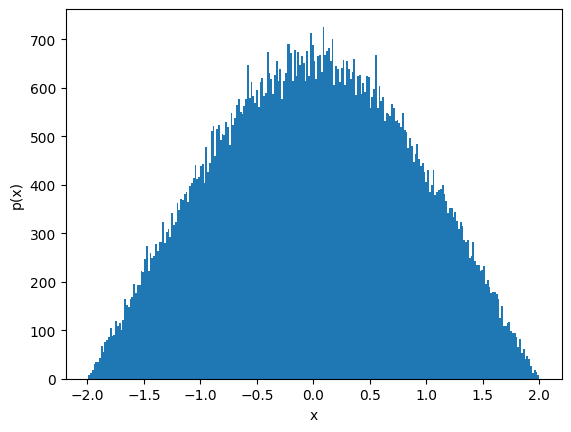

In [76]:
N = 100000

def p(x):
  return 0.5 * (4 - x**2) if abs(x) < 2 else 0
s
s = []
counts = 0
while len(s) < N:
  x = np.random.normal(0, 2)
  u = np.random.uniform(0, 0.5 * 4)
  if u < p(x):
    s.append(x)
  else:
    counts += 1
p = N / (N + counts)

print(f"Success probability: {p}")
plt.hist(s,bins = 250)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

## Q7


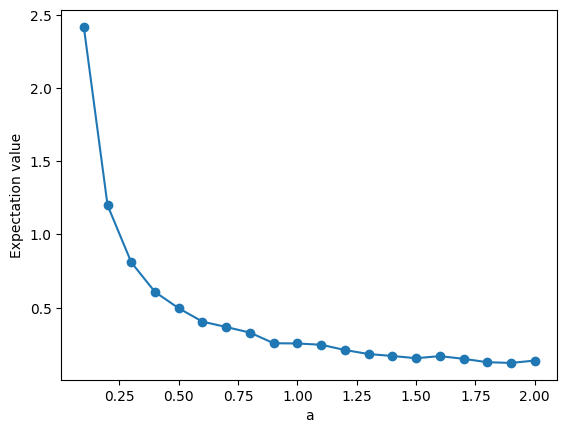

In [80]:
m = 1
w = 1  
N = 20000  
a_values = np.linspace(0.1, 2 , 20) 

def f(x, a):
	return np.exp(-a * x**2)

def df(x, a):
	return -2 * a * x * np.exp(-a * x**2)

def H(x, a):
	kinetic = -0.5 * df(x, a) / f(x, a)
	potential = 0.5 * m * w**2 * x**2
	return kinetic + potential

def step(x, delta=1):
	return x + delta * (2 * np.random.rand() - 1)

x = 0
E_a = []

for a in a_values:
	E_total = 0.0
	for i in range(N):
		x_new = step(x)
		if np.random.rand() < f(x_new, a) / f(x, a):
			x = x_new
		E_total += H(x, a)

	E = E_total / N

	E_a.append(E)

plt.plot(a_values, E_a, 'o-')
plt.xlabel('a')
plt.ylabel('Expectation value')
plt.show()